# Target Objects

The module target.py provides helper functions to create typical objects to be modelled in geosciences and visualized in the Viewer.

These objects are represented by the **TargetObject** class.

They can either:
* be instantiated as a generic **TargetObject** by providing an existing pyvista 3D object, or
* be created as a given predetermined shape (e.g., Sphere, CubeSample, DrillCore)

All objects can be created while specifying:
* a **translation** to place the object at the desired location
* a **rotation** to turn the object


In this example, you'll learn how to:
1. Create objects of the different types (Rock Samples, Outcrops outdoor or indoor)
1. Create scenes with any PyVista or VTK object
1. Show the normals to the object
1. Add texturing

<p style="text-align:left;">
    Previous page: <a href="./02_camera_definition.ipynb">Camera Definition</a>
    <span style="float:right;">
    Next page: <a href="./04_camera_manipulation.ipynb">Camera Manipulation</a>
    </span>
</p>

In [1]:
# this is to make pypho available from the local install
import sys
sys.path.append("..")

import pypho
print("Using PyPho version:", pypho.__version__)
from pypho import camera, target, graphics

Using PyPho version: 0.0.4


In [ ]:
# by default using the client side rendering is faster on binder 
# but it won't update automatically on pypho's update
# use "trame" backend if automated update is needed
import pyvista as pv
pv.set_jupyter_backend('client') # here fast interaction is prefered

## Rock Samples

Different classes of **TargetObjects** are proposed to represent rock samples:
* **Sphere**: a spherical object
* **CubeSample**: a parallelepipedoid shape to represent a (rock) sample width given width, height, and depth
* **DrillCore**: a cylindrical (rock) sample
* **Pebble**: this is a special model with a complex shape which looks like a pebble. It comes with a rock texture, that can also be applied to any other object.

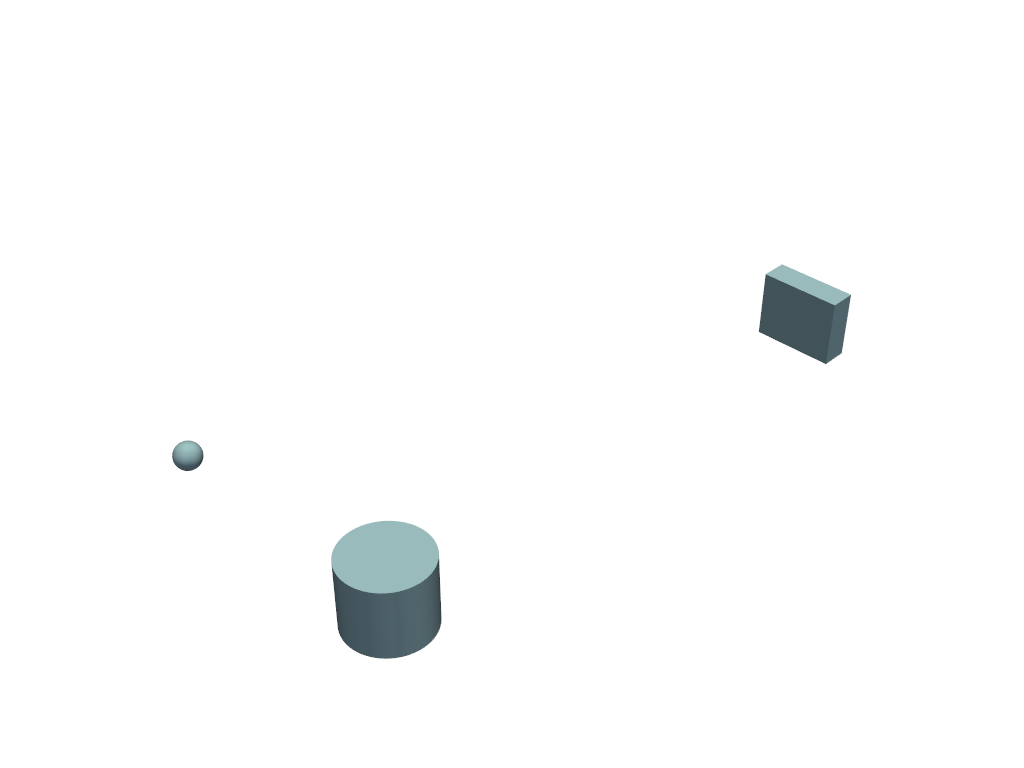

In [4]:
# base shape samples
sphere = target.Sphere(radius= 0.05, translation= [1,0,0], rotation= [0,0,0])
core = target.DrillCore(radius= 0.15, height= 0.25, translation= [1,1,0], rotation= [0,0,0])
cube = target.CubeSample(side_lengths = [0.25, 0.3, 0.1], translation= [-1,1,0.1], rotation= [0,90,0])

# Viewer
viewer = graphics.Viewer3D(objects = [sphere, core, cube])
viewer.show()

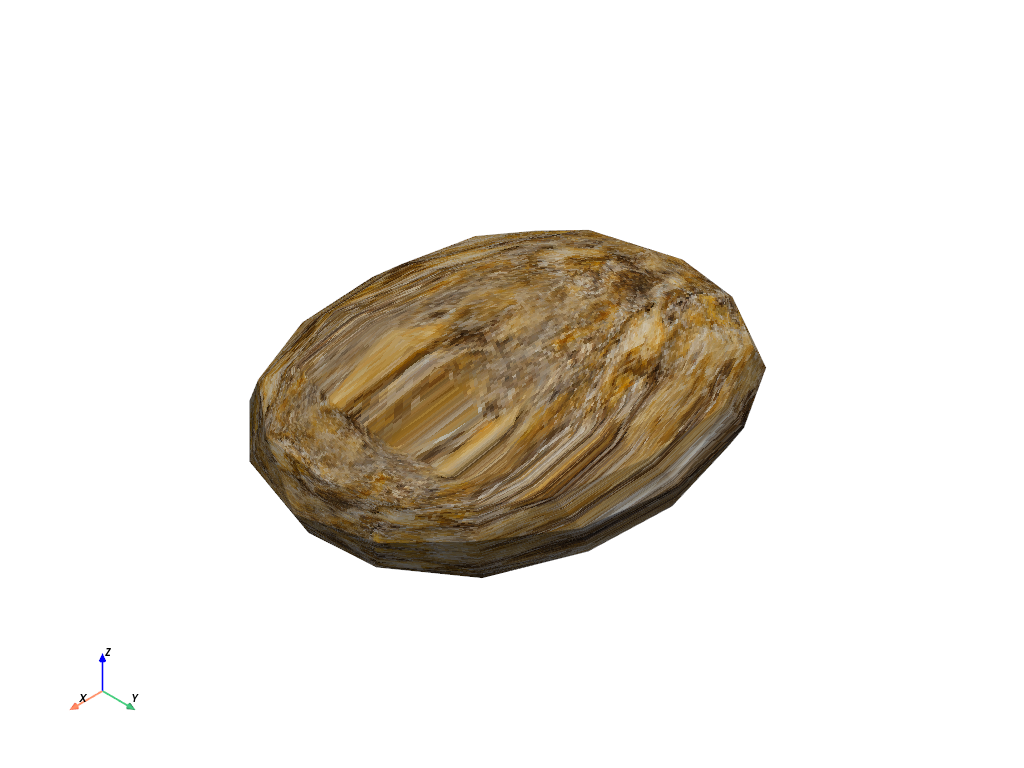

In [5]:
# Pebble
pebble = target.get_pebble_dataset()
rock_texture = target.get_rock_texture()
pebble.plot(texture= rock_texture)

## Outcrops outdor

Photogrammetry also proves useful in many outdor configurations, including:
* Digital Outcrop modelling
* Unmanned Aerial Vehicle (UAV), aka. drone, surveys

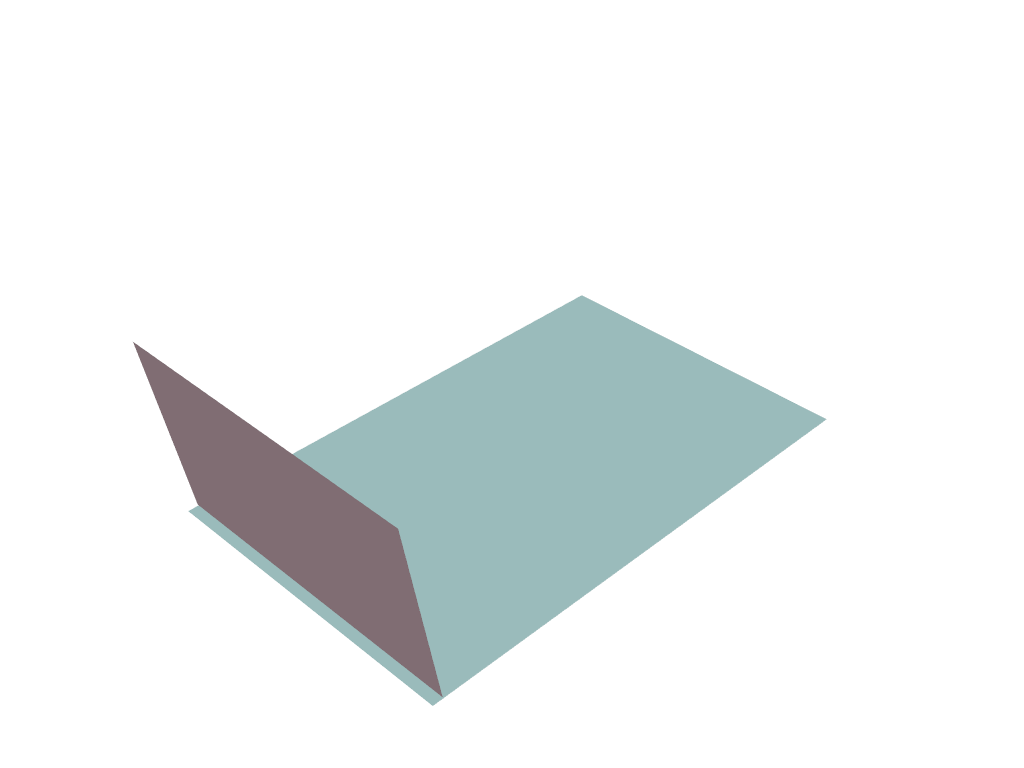

In [6]:
outcrop = target.Outcrop(
    width = 5,
    height = 3,
    translation= [2,0,0],
    rotation= [0,10]
)

ground = target.Ground(
    side_lengths = [8,5],
    translation = [-2.1,0,0],
    rotation = None
)

# Viewer
viewer = graphics.Viewer3D(objects = [outcrop, ground])
viewer.show()

## Outcrops indoor

Photogrammetry also proves useful in indoor configurations. For this, two objects are provided:
* Room: which represents a cubic room viewed from the inside
* Well: which represents a cylindrical room viewed from the inside

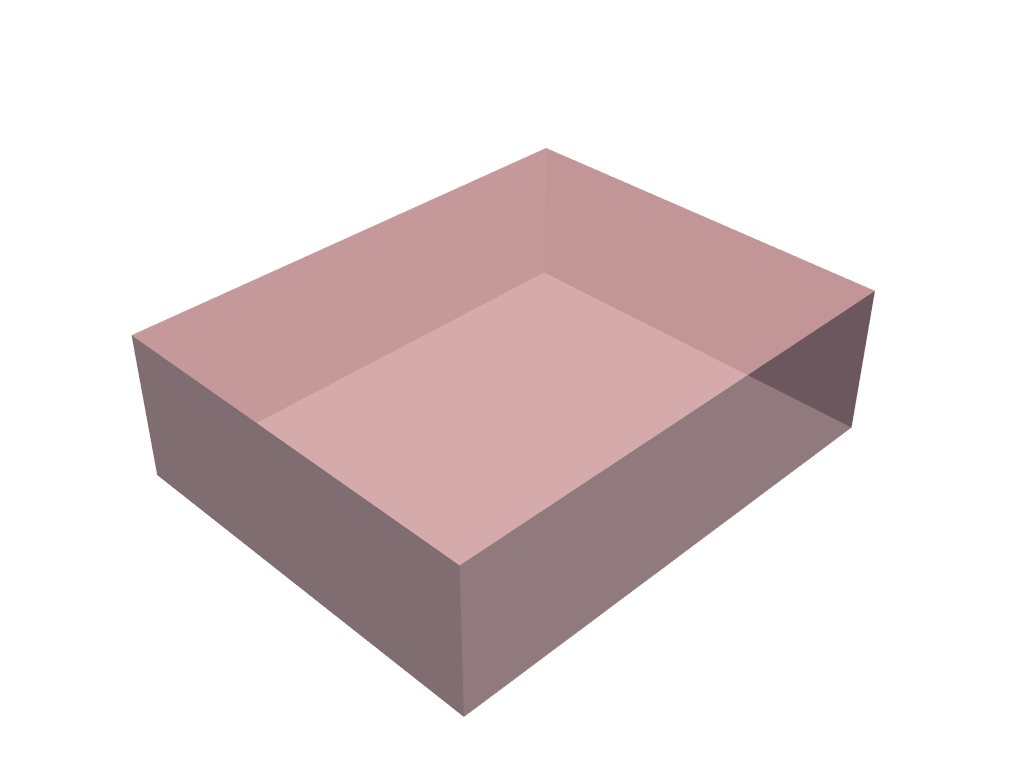

In [7]:
room = target.Room(
    side_lengths = [10,8,3],
    translation = None,
    rotation = None
)

# Viewer
viewer = graphics.Viewer3D(objects = [room])
viewer.show()

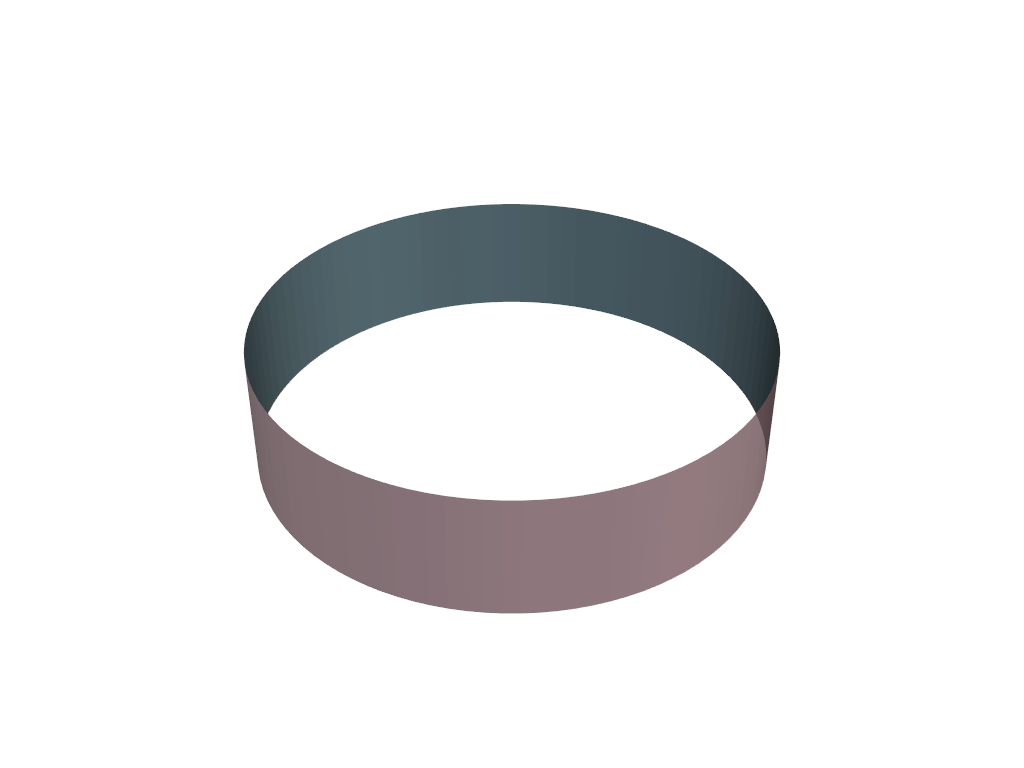

In [8]:
well = target.Well(
    radius = 3,
    height = 1.5,
    translation = None,
    rotation = None
)

# Viewer
viewer = graphics.Viewer3D(objects = [well])
viewer.show()

## Pyvista objects

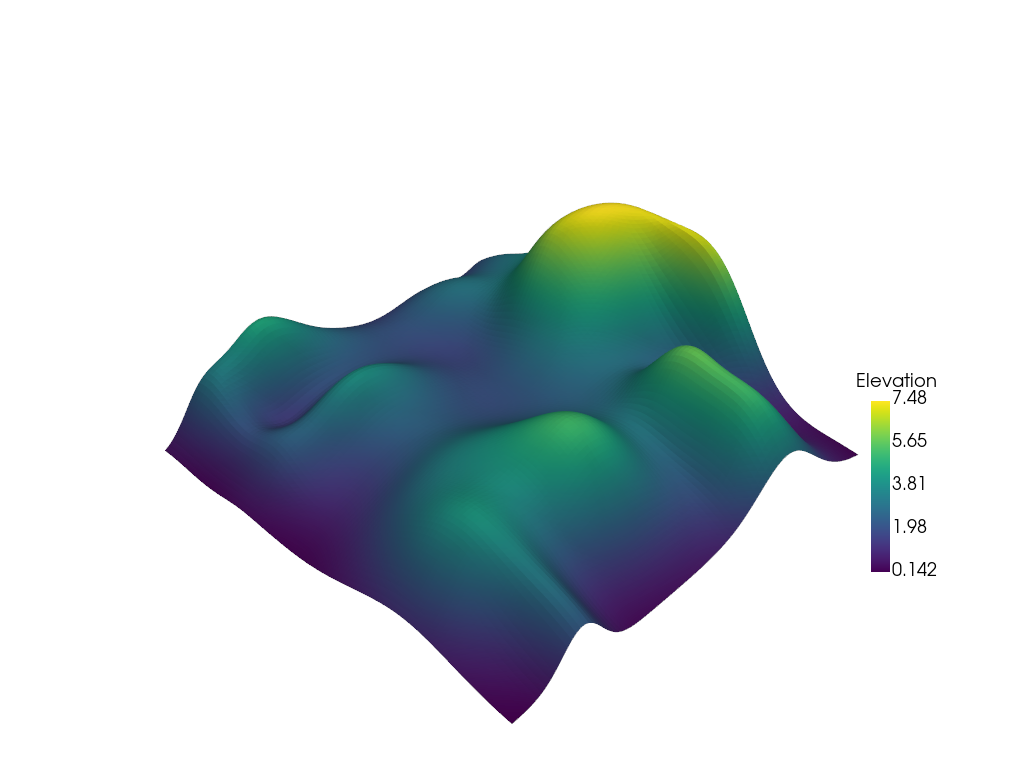

In [9]:
from pyvista import examples
hills = target.TargetObject(examples.load_random_hills())

# customize scalar bar
sargs = dict(height=0.25, width= 0.05, vertical=True, position_x=0.85, position_y=0.25)

# Viewer
viewer = graphics.Viewer3D(objects = hills, scalar_bar_args= sargs)
viewer.show()

# Normals

The normals of the objects are set properly.

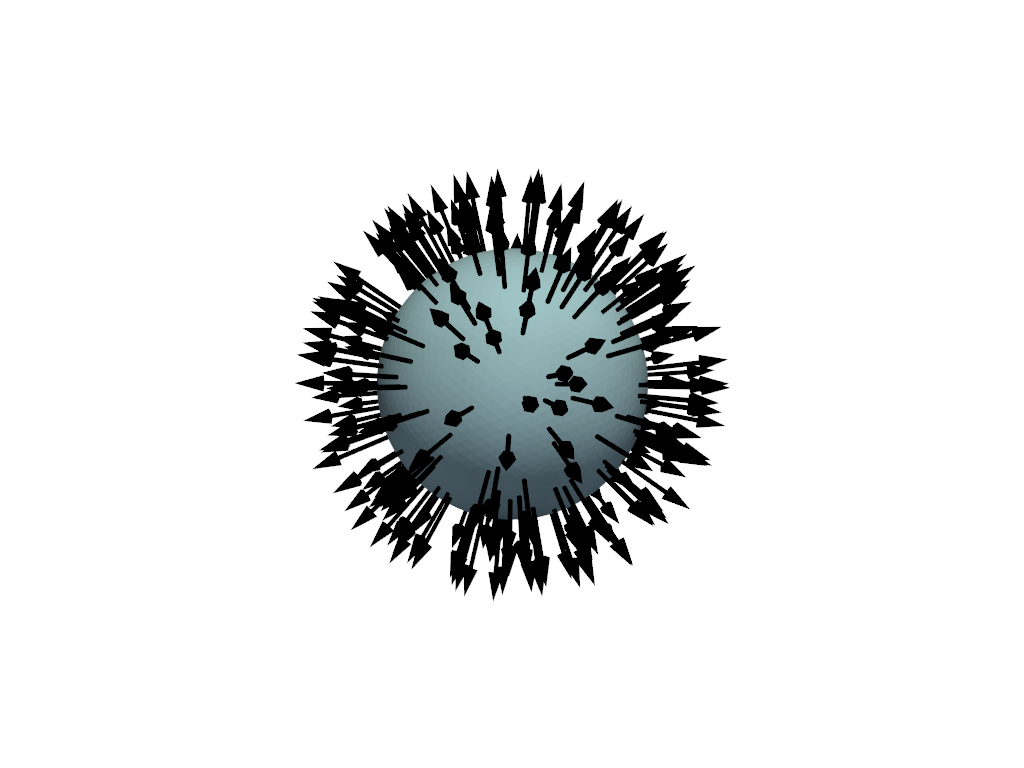

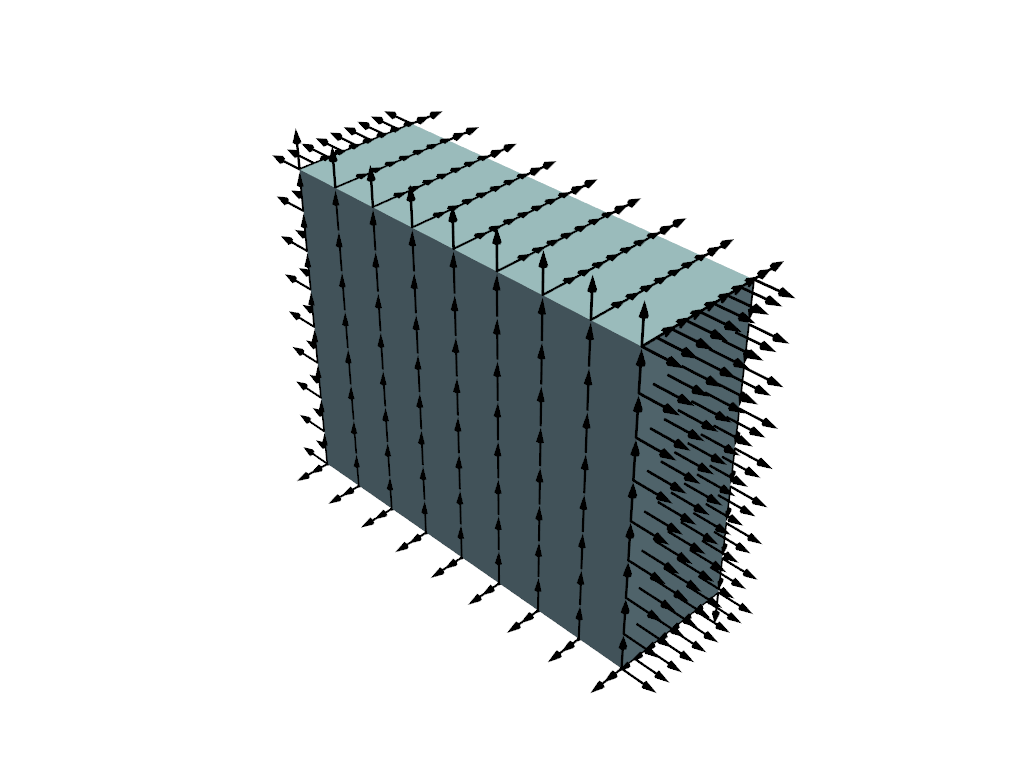

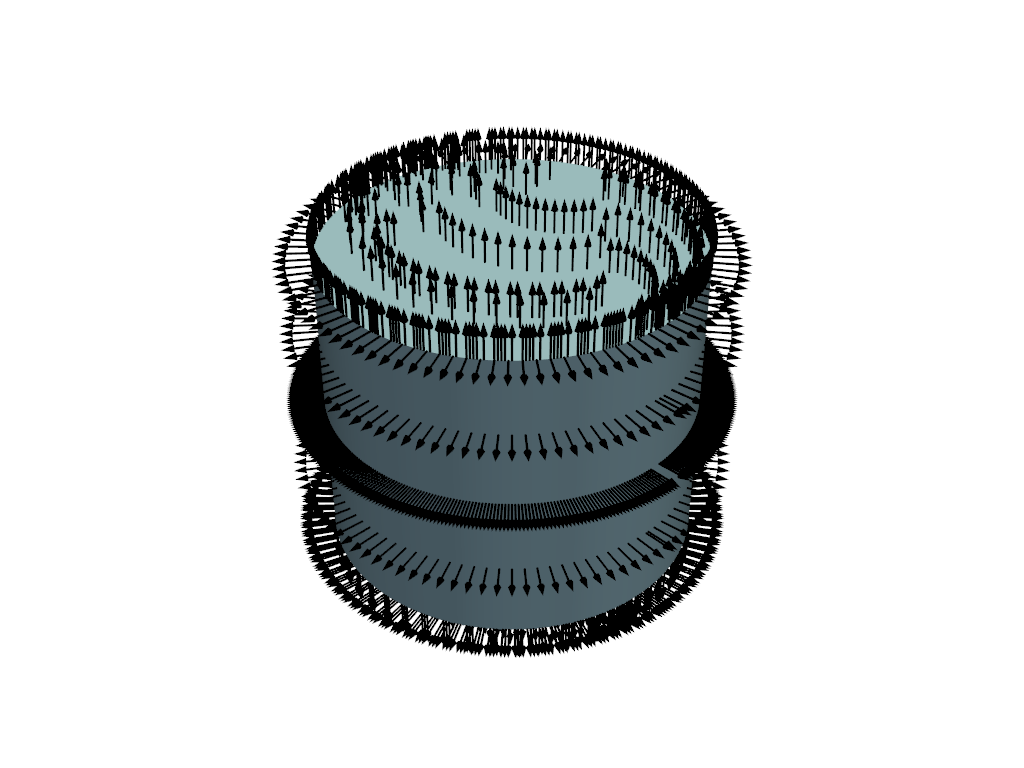

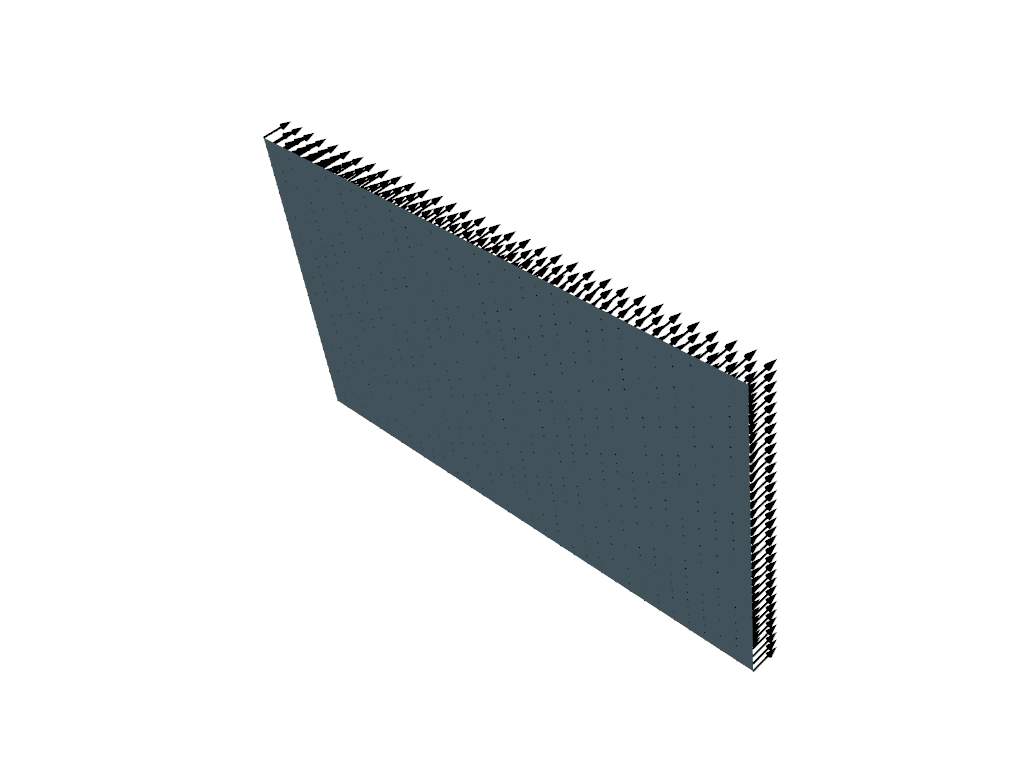

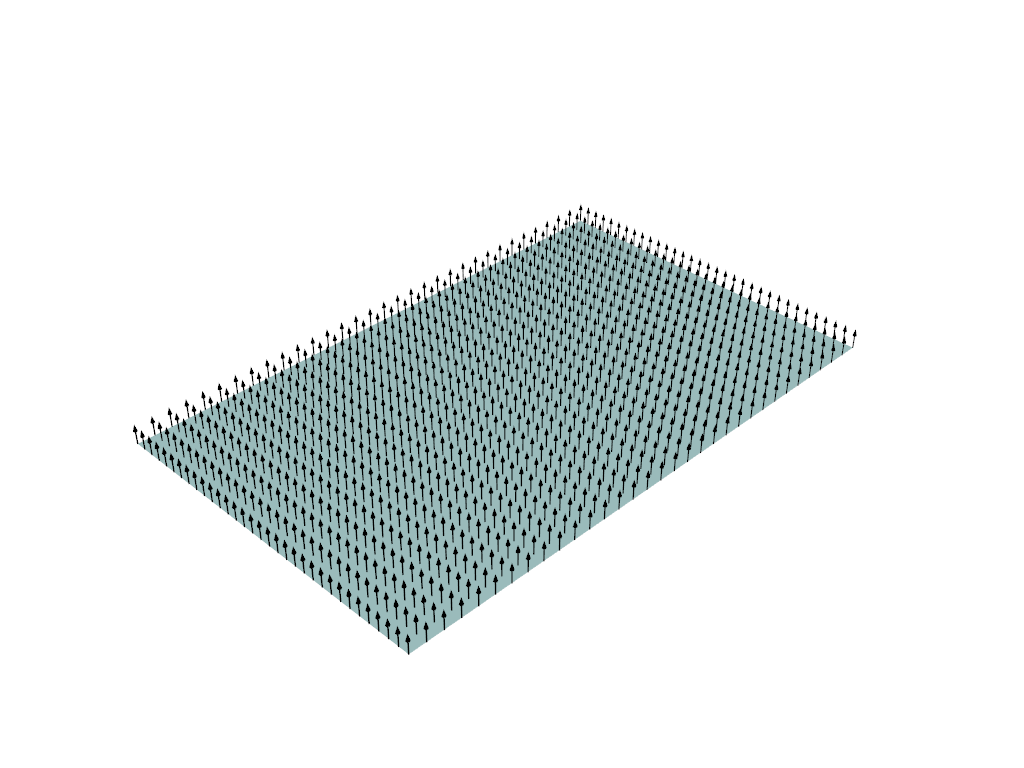

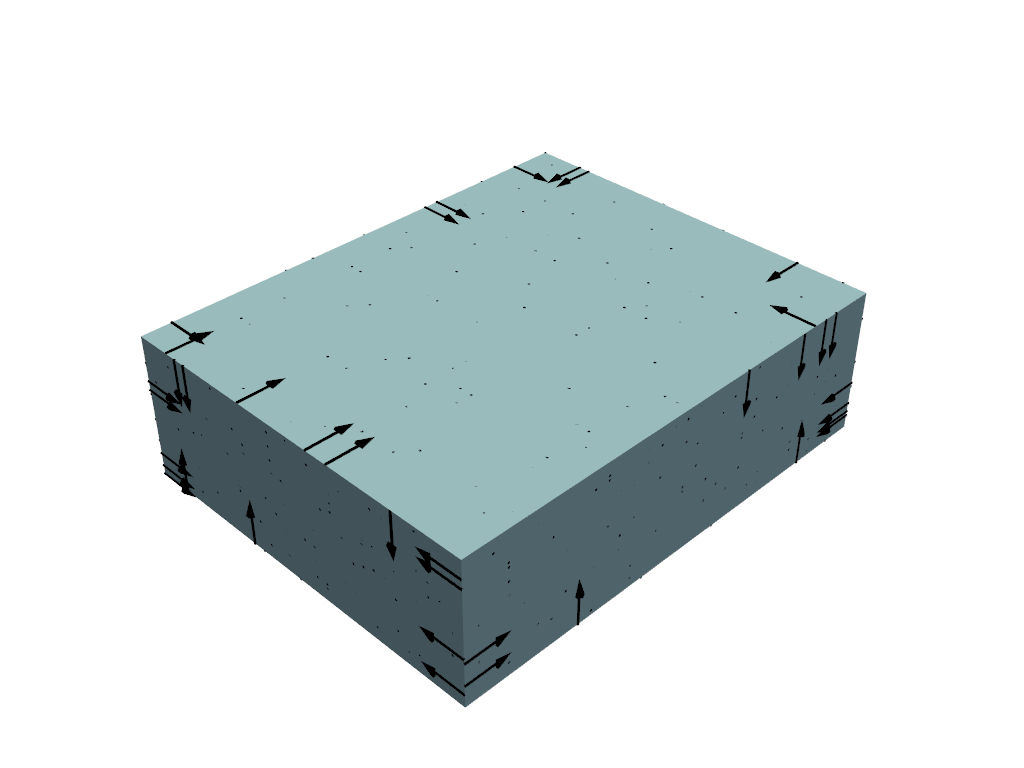

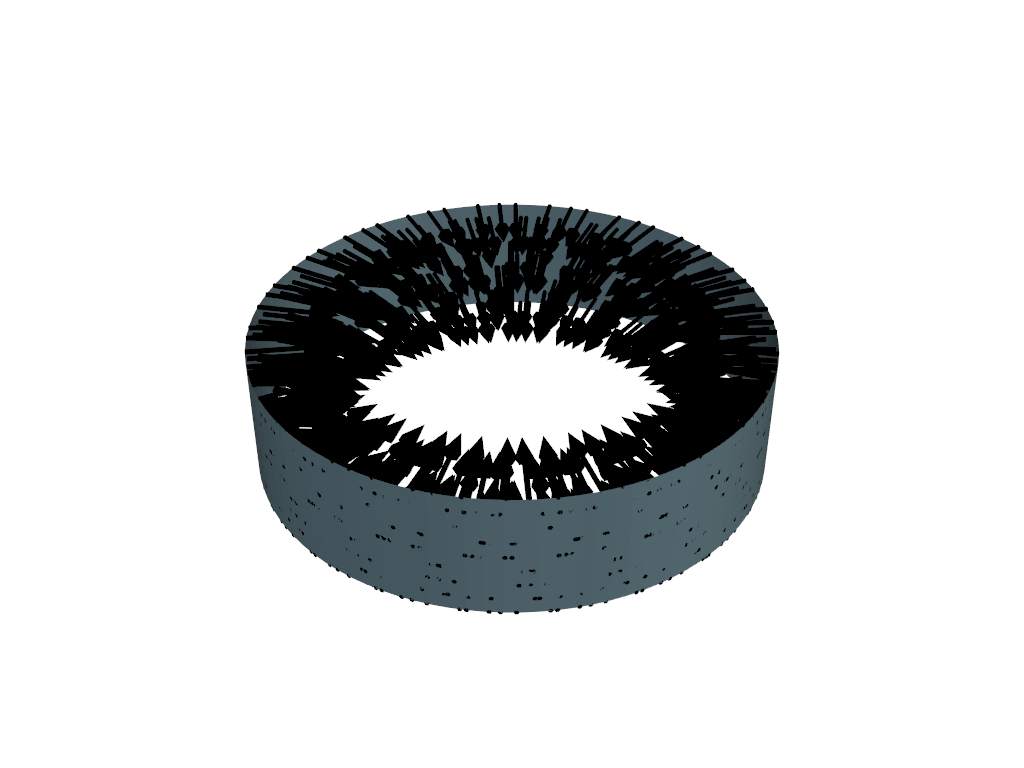

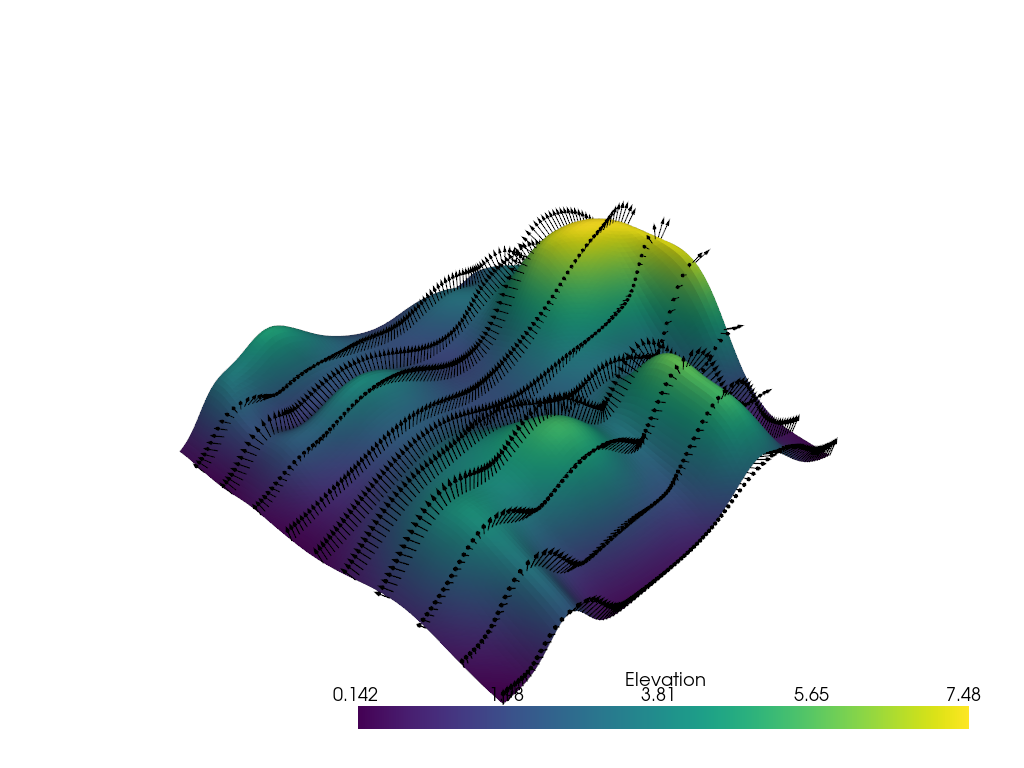

In [10]:
sphere.plot_normals(mag=0.03, use_every=10)
cube.plot_normals(mag=0.03, use_every=1)
core.plot_normals(mag=0.03, use_every=2)
outcrop.plot_normals(mag=0.3, use_every=1)
ground.plot_normals(mag=0.3, use_every=1)
room.plot_normals(mag=1, use_every=10)
well.plot_normals(mag=1, use_every=10)
hills.plot_normals(mag=1, use_every=10)

# Texturing

All the objects should accept texturing.

NB: for objects not defined by Pypho's classes directly, make sure the texture coordinates are set.

In [11]:
x0, x1,y0, y1, _,_= hills.bounds
_ = hills.texture_map_to_plane(inplace= True,
                               origin= [x0,y0,0],
                               point_u=[x1,y0,0],
                               point_v=[x0,y1,0]
)

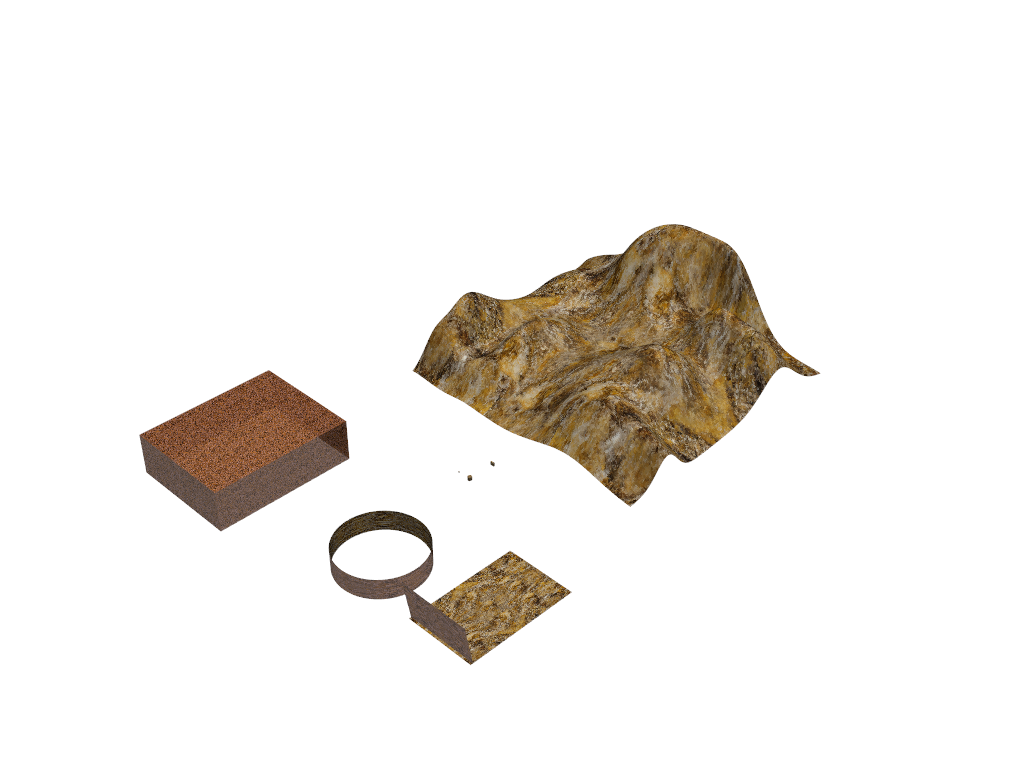

In [12]:
viewer = graphics.Viewer3D(objects=[sphere, 
                                    core.copy(),
                                    cube.copy(), 
                                    outcrop.copy().translate([10,10,0], return_object= True),
                                    ground.copy().translate([10,10,0], return_object= True),
                                    room.copy().translate([10,-10,0], return_object= True),
                                    well.copy().translate([10,3,0], return_object= True),
                                    target.TargetObject(hills, deep_copy= True).translate([-14,-10,0], return_object= True)],
                           target_object_texture= target.get_rock_texture()
                           )
viewer.show()